In [1]:
import torch

In [4]:
print(torch.__version__)

2.0.1+cu117


In [1]:
!nvidia-smi

Wed Nov 20 02:51:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.29                 Driver Version: 531.29       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650       WDDM | 00000000:01:00.0  On |                  N/A |
| N/A   43C    P5                5W /  N/A|    137MiB /  4096MiB |     30%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Tensor

#### creating tensors

In [6]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [10]:
scalar.ndim  # Não possui dimensão

0

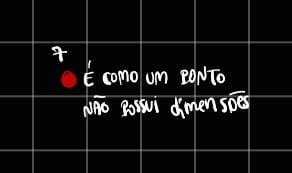

In [26]:
scalar.item()

7

In [12]:
# vector
vector = torch.tensor([1, 7])
vector

tensor([1, 7])

In [13]:
vector.ndim  # as DIMENSÕES tem relação com o numero de [] que o tensor possui, neste caso apenas 1

1

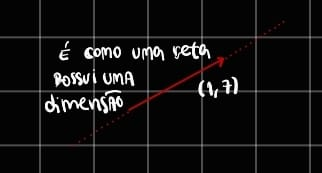

In [14]:
vector.shape

torch.Size([2])

In [18]:
# Matrix
M = torch.tensor([[7, 8], 
                  [9, 10]])

In [27]:
M.ndim

2

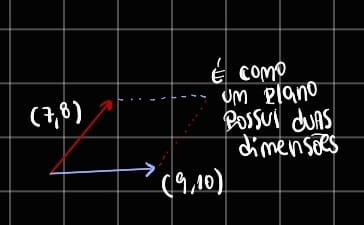

In [20]:
M.shape

torch.Size([2, 2])

In [21]:
# Tensor
T = torch.tensor([[[1, 2, 3],
                   [3, 6, 9],
                   [2, 4, 6]]])

In [22]:
T.ndim

3

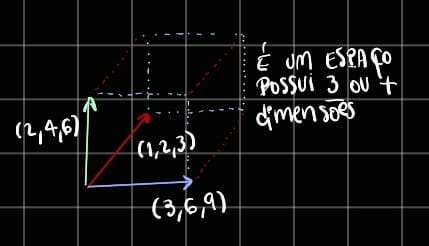

In [25]:
T.shape

torch.Size([1, 3, 3])

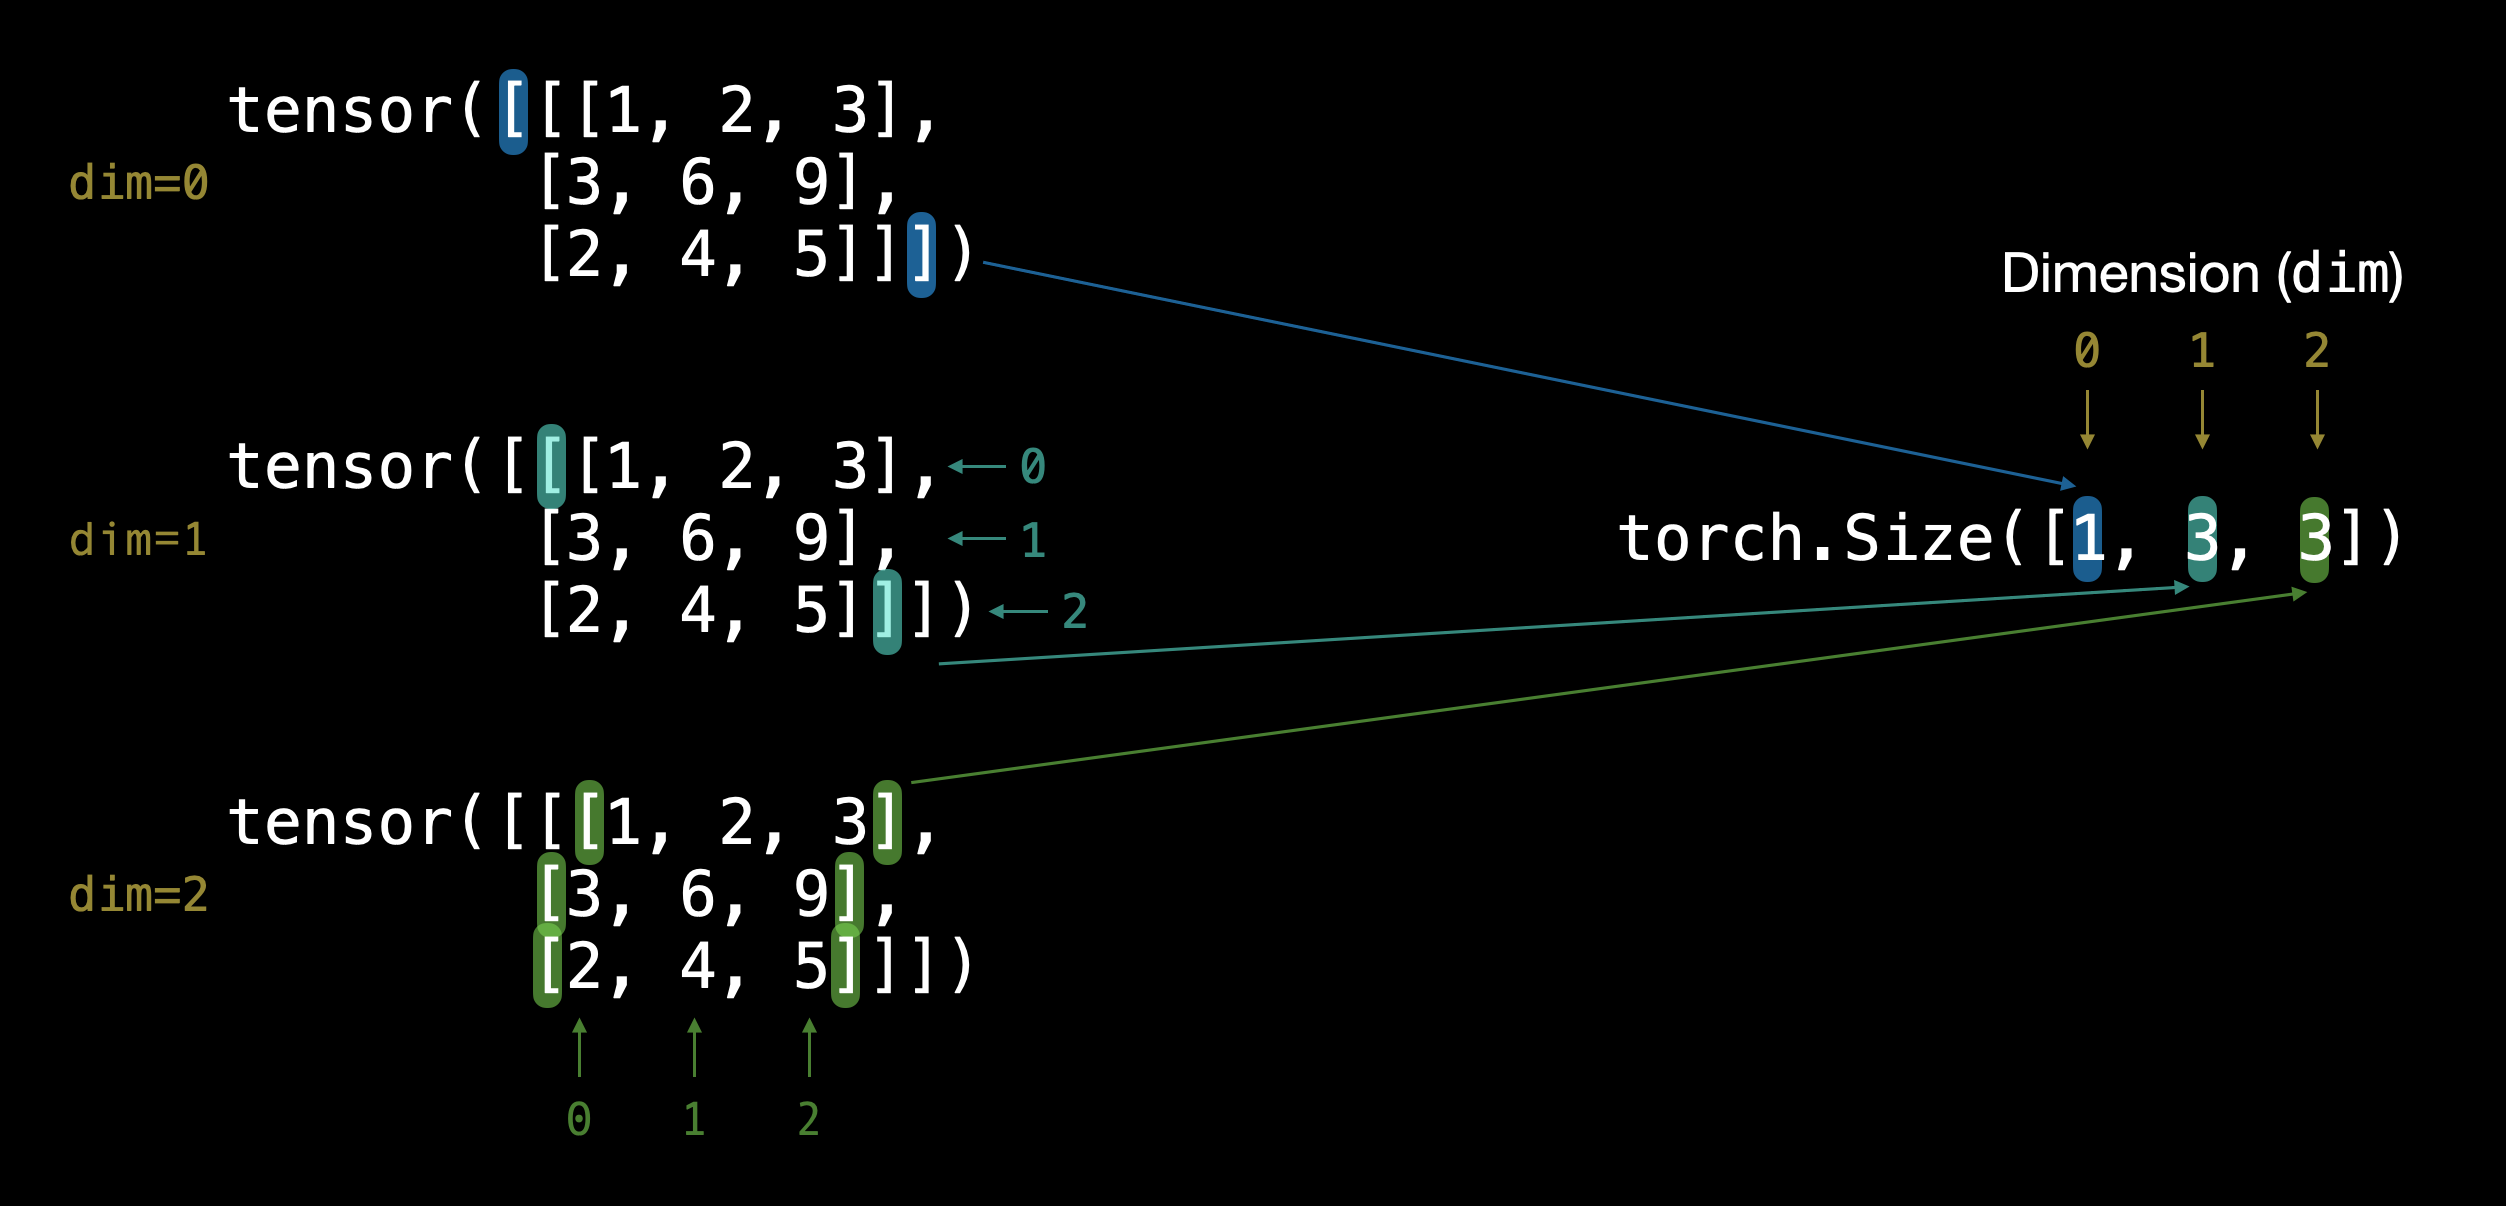

### Random Tensors

In [30]:
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.1868, 0.1162, 0.7534, 0.2504],
        [0.9862, 0.5242, 0.4742, 0.2065],
        [0.5395, 0.1113, 0.6862, 0.9566]])

In [33]:
random_image_size_tensor = torch.rand(size=(3, 224, 224))

In [35]:
random_image_size_tensor.ndim

3

### Zeros, Ones and Eye

In [43]:
zeros = torch.zeros(size=(4, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [44]:
ones = torch.ones(size=(4, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [46]:
torch.eye(4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

### Range of tensors and tensors-like

In [52]:
one_to_ten = torch.arange(start=1, end=10, step=1)
one_to_ten

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
ten_zeros = torch.zeros_like(one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
ten_ones = torch.ones_like(one_to_ten)
ten_ones

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1])

### Tensor Datatypes

In [62]:
# Flaot32 é o default do que for float
float_32_tensor = torch.tensor(
    [3., 2., 1.],
    dtype=None,  # qual é o seu datatype
    device=None,  # cpu ou gpu
    requires_grad=False  # se deve ou não calcular o gradiente nas operações feitas com esse tensor
)
float_32_tensor.dtype

torch.float32

In [67]:
float_16_tensor = torch.tensor(
    [3., 2., 1.],
    dtype=torch.half,  # torch.float16 ou torch.half é a mesma coisa
    device=None,
    requires_grad=False
)
float_16_tensor.dtype

torch.float16

##### Os `3` maiores erros ao lidar com Tensores são:
- Erro de **datettype**
- Erro de **shape**
- Erro de **device** (os tensores não estão no mesmo lugar, device)

### Squeeze, Unsqueeze, Permuting Tensors

In [4]:
x = torch.tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
print(f'ndim: {x.ndim}, shape: {x.shape}')

ndim: 2, shape: torch.Size([1, 9])


In [8]:
x_squeeze = x.squeeze()  # remove todas as dimensões com apenas 1 elemento
print(f'ndim: {x_squeeze.ndim}, shape: {x_squeeze.shape}')

ndim: 1, shape: torch.Size([9])


In [11]:
x_unsqueeze = x.unsqueeze(0)  # adiciona uma dimensão em uma posição especifica (primeira)
print(f'ndim: {x_unsqueeze.ndim}, shape: {x_unsqueeze.shape}')
x_unsqueeze = x.unsqueeze(-1)  # adiciona uma dimensão em uma posição especifica (ultima)
print(f'ndim: {x_unsqueeze.ndim}, shape: {x_unsqueeze.shape}')

ndim: 3, shape: torch.Size([1, 1, 9])
ndim: 3, shape: torch.Size([1, 9, 1])


In [18]:
# permute -> permuta as dimensões do seu tensor
x = torch.randn(2, 3, 5)
print(x.size())
print(x.permute(2, 0, 1).size())
print(torch.permute(x, (2, 0, 1)).size())

torch.Size([2, 3, 5])
torch.Size([5, 2, 3])
torch.Size([5, 2, 3])


### Selecting Data From Tensors

In [26]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [27]:
x[0, 0, 0]

tensor(1)

In [29]:
x[0][0][0]

tensor(1)

In [30]:
x[:, 0]

tensor([[1, 2, 3]])

In [31]:
x[:, :, 1]

tensor([[2, 5, 8]])

In [34]:
x[:, 1, 1]

tensor([5])

### Pytorch Tensors and Numpy Arrays

In [35]:
import numpy as np

In [37]:
# np.array -> torch.tensor
array = np.arange(1., 8.)
tensor = torch.from_numpy(array).type(torch.float32)  # por padrão vira float64 do numpy
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [38]:
# torch.tensor -> np.array
tensor = torch.ones(7)
array = tensor.numpy()
tensor, array

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

### Pytorch Reproducibility

In [39]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

In [40]:
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

In [41]:
random_tensor_C == random_tensor_D

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### Accessing a GPU

In [43]:
torch.cuda.is_available()

True

In [44]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [45]:
torch.cuda.device_count()

1

### Puting Tensors on and off the GPU

In [46]:
tensor = torch.tensor([1, 2, 3])
tensor.device

device(type='cpu')

In [48]:
tensor_gpu = tensor.to(device)
tensor_gpu.device

device(type='cuda', index=0)

In [50]:
tensor_gpu.cpu().device

device(type='cpu')